In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [3]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from keras.utils import to_categorical
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

In [4]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 31)

In [11]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


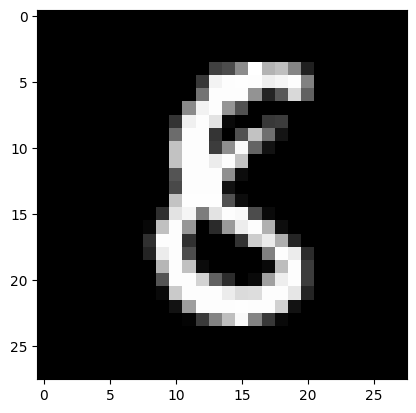

8


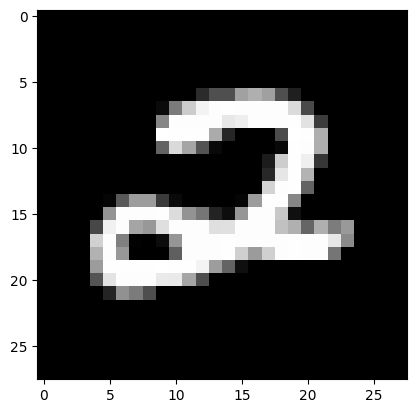

2


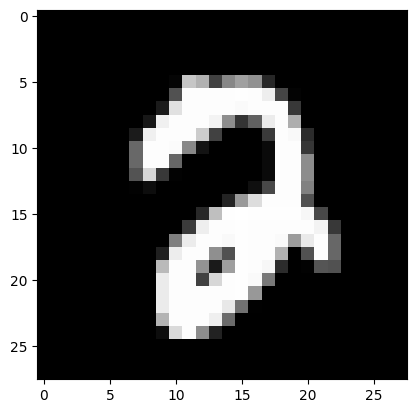

2


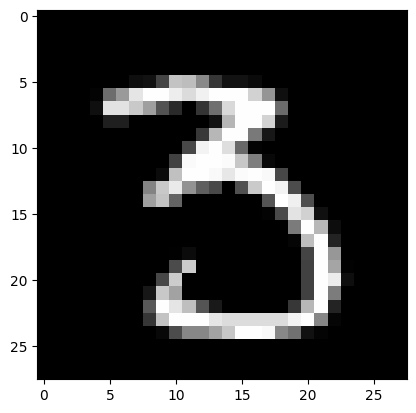

3


In [12]:
for i in range(4):
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
  plt.show()

  print(y_train[i])

In [13]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)

Shape of transformed X train: (60000, 784)


In [14]:
# переведем метки в one-hot

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)


In [ ]:
 #1. создаем модель - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем первый скрытый слой
#model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
#model.add(Dense(units=100, activation='sigmoid'))
# 4. добавляем выходной слой
model.add(Dense(units=num_classes, activation='softmax'))
# 5. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# вывод информации об архитектуре модели
print(model.summary())
# Обучаем модель
H = model.fit(X_train, y_train, validation_split=0.1, epochs=50)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7060 - loss: 1.1734 - val_accuracy: 0.8710 - val_loss: 0.5186
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8774 - loss: 0.4847 - val_accuracy: 0.8860 - val_loss: 0.4319
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8904 - loss: 0.4151 - val_accuracy: 0.8912 - val_loss: 0.3966
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8973 - loss: 0.3828 - val_accuracy: 0.8947 - val_loss: 0.3761
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9000 - loss: 0.3700 - val_accuracy: 0.8998 - val_loss: 0.3625
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9021 - loss: 0.3542 - val_accuracy: 0.9018 - val_loss: 0.3535
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9018 - loss: 0.3486 - val_accuracy: 0.9032 - val_loss: 0.3454
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9087 - loss: 0.32

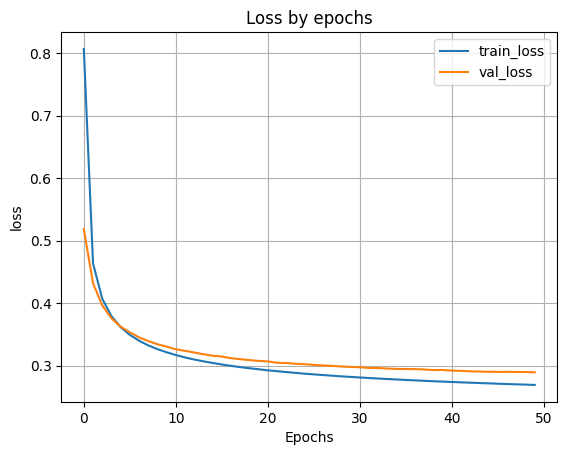

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9165 - loss: 0.2995
Loss on test data: 0.28918400406837463
Accuracy on test data: 0.9185000061988831


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5408 - loss: 1.8881 - val_accuracy: 0.8193 - val_loss: 0.9683
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8315 - loss: 0.8472 - val_accuracy: 0.8612 - val_loss: 0.6255
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8637 - loss: 0.5878 - val_accuracy: 0.8780 - val_loss: 0.5065
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8750 - loss: 0.4923 - val_accuracy: 0.8863 - val_loss: 0.4451
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8874 - loss: 0.4305 - val_accuracy: 0.8917 - val_loss: 0.4081
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8900 - loss: 0.4001 - val_accuracy: 0.8977 - val_loss: 0.3835
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8981 - loss: 0.3727 - val_accuracy: 0.9022 - val_loss: 0.3661
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9003 - loss: 0.35

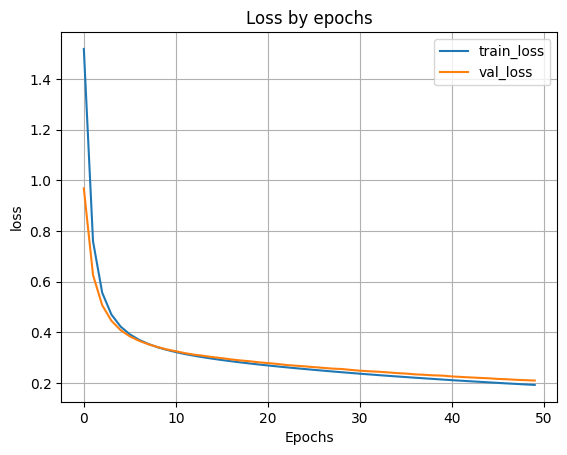

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9381 - loss: 0.2127
Loss on test data: 0.20470060408115387
Accuracy on test data: 0.9412999749183655


In [ ]:
#1. создаем модель - объявляем ее объектом класса Sequential
model_100 = Sequential()
# 2. добавляем первый скрытый слой
model_100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
#model.add(Dense(units=100, activation='sigmoid'))
# 4. добавляем выходной слой
model_100.add(Dense(units=num_classes, activation='softmax'))
# 5. компилируем модель
model_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_100.summary())
# Обучаем модель
H = model_100.fit(X_train, y_train, validation_split=0.1, epochs=50)

# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2102 - loss: 2.2695 - val_accuracy: 0.5102 - val_loss: 2.1087
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5495 - loss: 1.9930 - val_accuracy: 0.5872 - val_loss: 1.5403
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6757 - loss: 1.3754 - val_accuracy: 0.7538 - val_loss: 1.0207
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7764 - loss: 0.9373 - val_accuracy: 0.8162 - val_loss: 0.7629
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8251 - loss: 0.7187 - val_accuracy: 0.8405 - val_loss: 0.6221
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8504 - loss: 0.5963 - val_accuracy: 0.8548 - val_loss: 0.5365
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8644 - loss: 0.5199 - val_accuracy: 0.8715 - val_loss: 0.4806
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8744 - loss: 0.4

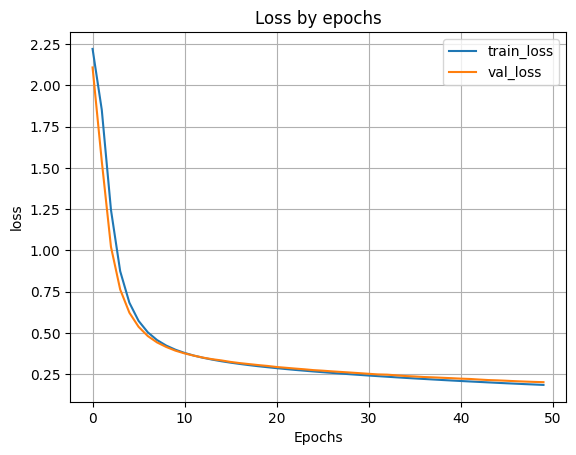

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.2003
Loss on test data: 0.19404223561286926
Accuracy on test data: 0.9413999915122986


In [ ]:
#1. создаем модель - объявляем ее объектом класса Sequential
model_2_100 = Sequential()
# 2. добавляем первый скрытый слой
model_2_100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
model_2_100.add(Dense(units=100, activation='sigmoid'))
# 4. добавляем выходной слой
model_2_100.add(Dense(units=num_classes, activation='softmax'))
# 5. компилируем модель
model_2_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_2_100.summary())
# Обучаем модель
H = model_2_100.fit(X_train, y_train, validation_split=0.1, epochs=50)

# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_2_100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

In [ ]:
# сохранение модели на диск, к примеру, в папку best_model
# В общем случае может быть указан произвольный путь
filepath='/content/drive/MyDrive/Colab Notebooks/best_model.keras'
model_2_100.save(filepath)


NameError: name 'model_2_100' is not defined

In [5]:
# Загрузка модели с диска
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/best_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
NN output: [[4.8947215e-05 3.4176528e-03 8.6587053e-05 9.2398334e-01 5.9264214e-05
  5.0175749e-02 8.9853020e-06 1.3068309e-03 7.7676596e-03 1.3145068e-02]]


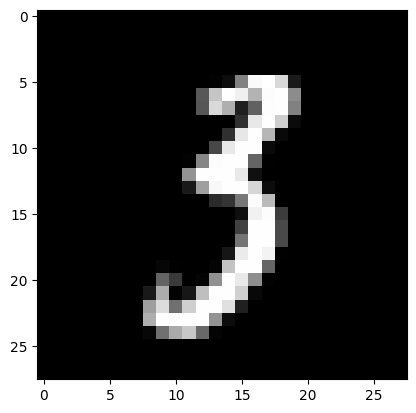

Real mark:  3
NN answer:  3


In [15]:
# вывод тестового изображения и результата распознавания
n = 123
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


In [17]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('1.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)


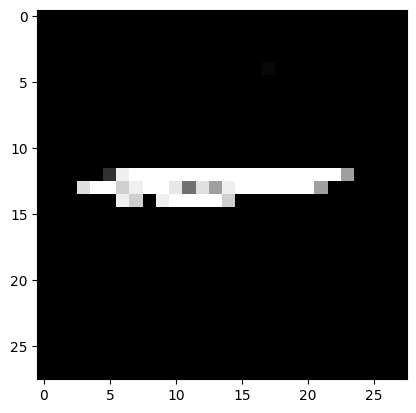

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
I think it's  4


In [18]:
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))
